In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data['mainroad'].info

<bound method Series.info of 0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 545, dtype: object>

In [4]:
drop = data.select_dtypes(include=['object']).columns
data = data.drop(columns=drop)
data

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [5]:
y = data[['price']]
X = data.drop(columns='price')
X

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [6]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from Model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standa X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standa y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)  

In [8]:
# Train
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

Epoch: 0, Loss: 3.538776551208832
Epoch: 100, Loss: 2.5507341546375963
Epoch: 200, Loss: 1.8659279582265225
Epoch: 300, Loss: 1.389551420322537
Epoch: 400, Loss: 1.0567632937744855
Epoch: 500, Loss: 0.8231568742873202
Epoch: 600, Loss: 0.6582715312585925
Epoch: 700, Loss: 0.5411734042969757
Epoch: 800, Loss: 0.45744377898095023
Epoch: 900, Loss: 0.3971254226680968
Epoch: 1000, Loss: 0.3533210790370617
Epoch: 1100, Loss: 0.32123613718544974
Epoch: 1200, Loss: 0.29752398295959925
Epoch: 1300, Loss: 0.27983774512592546
Epoch: 1400, Loss: 0.2665228873055975
Epoch: 1500, Loss: 0.2564060023739407
Epoch: 1600, Loss: 0.24864938811333612
Epoch: 1700, Loss: 0.242650661073526
Epoch: 1800, Loss: 0.23797325402174485
Epoch: 1900, Loss: 0.23429812941939673
Epoch: 2000, Loss: 0.23139009888067125
Epoch: 2100, Loss: 0.22907422329941887
Epoch: 2200, Loss: 0.22721919084675388
Epoch: 2300, Loss: 0.22572554156625949
Epoch: 2400, Loss: 0.22451727151673564
Epoch: 2500, Loss: 0.2235358041128984
Epoch: 2600, Lo

In [9]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

In [10]:
y_pred_original

array([[6178519.67387742],
       [6368929.83345365],
       [3282729.60795355],
       [4226179.49993159],
       [3409924.63889589],
       [4262102.84963682],
       [5494059.95884612],
       [5559453.51705994],
       [3373815.78637719],
       [3020886.76007938],
       [9518845.65486479],
       [3250001.02449756],
       [3183926.33714301],
       [3639535.07949399],
       [3908156.47201015],
       [6172109.53816636],
       [3148002.98743777],
       [4873034.07666453],
       [4826720.04347209],
       [3887899.64166812],
       [5222643.16616012],
       [4294522.67287153],
       [3162004.36143192],
       [4193761.58984205],
       [5748789.05454972],
       [7618284.67909121],
       [2989407.39773475],
       [4793124.8280619 ],
       [7434202.02535175],
       [3456763.20872072],
       [5101885.04934485],
       [3983804.63936965],
       [6214549.72281218],
       [4724827.25730355],
       [4308604.2987879 ],
       [5625235.53756461],
       [4793067.09249742],
 

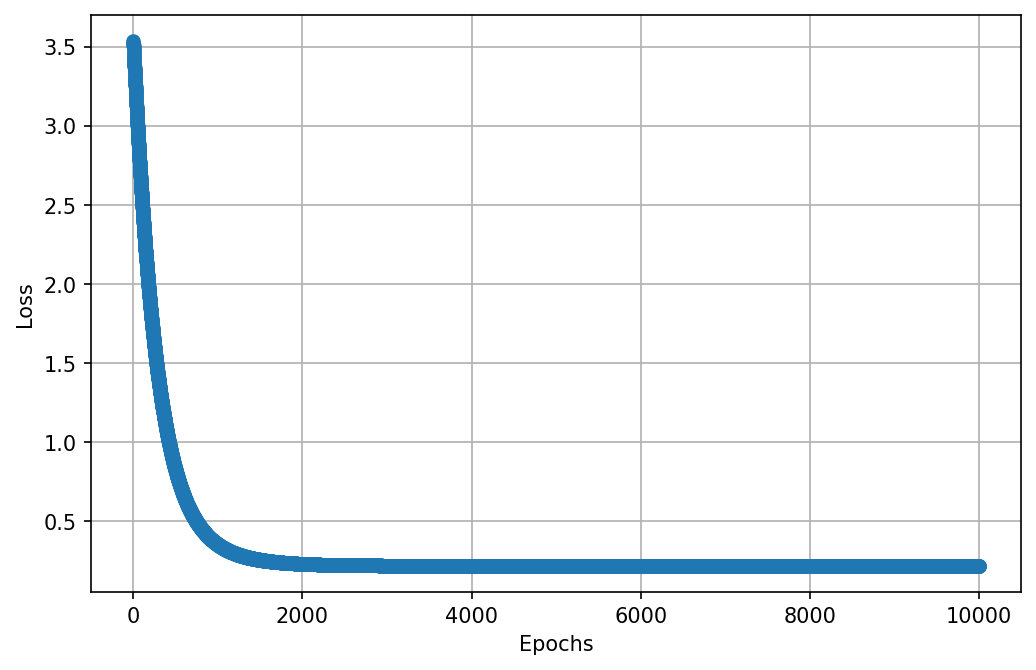

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=150)
plt.plot(range(model.epochs), model.cost, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()